In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

features = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.data', sep='\t', names=features)
Matrix_R = df.pivot_table(index=['user_id'], columns=['movie_id'], values='rating')

In [12]:
Matrix_R.loc[1,100]

5.0

In [3]:
df.shape

(100000, 4)

In [4]:
avg_rating_each_movie = Matrix_R.mean(axis=0)
Matrix_R = Matrix_R.replace(np.nan, avg_rating_each_movie)
each_user_avg_rating = Matrix_R.mean(axis=1)
Matrix_R_norm = Matrix_R.sub(each_user_avg_rating, axis=0)

In [5]:
Matrix_R_norm

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.910010,-0.089990,0.910010,-0.089990,-0.089990,1.910010,0.910010,-2.089990,1.910010,-0.089990,...,-0.089990,0.910010,-0.089990,-1.089990,-0.089990,-2.089990,-0.089990,-1.089990,-0.089990,-0.089990
2,0.919898,0.126005,-0.046768,0.470138,0.222224,0.496822,0.718368,0.915332,0.816220,-1.080102,...,-0.080102,0.919898,-0.080102,-1.080102,-0.080102,-2.080102,-0.080102,-1.080102,-0.080102,-0.080102
3,0.817893,0.145681,-0.027092,0.489814,0.241900,0.516498,0.738044,0.935008,0.835896,0.771035,...,-0.060426,0.939574,-0.060426,-1.060426,-0.060426,-2.060426,-0.060426,-1.060426,-0.060426,-0.060426
4,0.789061,0.116850,-0.055924,0.460982,0.213068,0.487666,0.709212,0.906176,0.807064,0.742203,...,-0.089257,0.910743,-0.089257,-1.089257,-0.089257,-2.089257,-0.089257,-1.089257,-0.089257,-0.089257
5,0.961597,-0.038403,-0.005070,0.511836,0.263922,0.538520,0.760066,0.957030,0.857918,0.793057,...,-0.038403,0.961597,-0.038403,-1.038403,-0.038403,-2.038403,-0.038403,-1.038403,-0.038403,-0.038403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.771265,0.099053,-0.073721,0.443185,0.195272,0.469869,0.691416,0.888380,1.892946,0.724407,...,-0.107054,0.892946,-0.107054,-1.107054,-0.107054,-2.107054,-0.107054,-1.107054,-0.107054,-0.107054
940,0.820431,0.148219,-0.024554,-1.057888,0.244438,0.519035,0.942112,1.942112,-0.057888,0.773573,...,-0.057888,0.942112,-0.057888,-1.057888,-0.057888,-2.057888,-0.057888,-1.057888,-0.057888,-0.057888
941,1.919249,0.125356,-0.047417,0.469488,0.221575,0.496172,0.919249,0.914683,0.815570,0.750710,...,-0.080751,0.919249,-0.080751,-1.080751,-0.080751,-2.080751,-0.080751,-1.080751,-0.080751,-0.080751


In [6]:
U, S, VT = np.linalg.svd(Matrix_R_norm)
k = 100
low_rank_approx_U = U[:, :k]
low_rank_approx_S = np.diag(S[:k])
low_rank_approx_VT = VT[:k, :]
Matrix_R_norm_reconstruction = np.dot(low_rank_approx_U, np.dot(low_rank_approx_S, low_rank_approx_VT))

In [7]:
sqrt_S = np.sqrt(low_rank_approx_S)
low_rank_approx_U_dot_sqrt_S = np.dot(low_rank_approx_U, sqrt_S)
sqrt_S_dot_low_rank_approx_VT = np.dot(sqrt_S, low_rank_approx_VT)

def rating_prediction(i, j, user_mean):
    predicted_rating = user_mean + np.dot(low_rank_approx_U_dot_sqrt_S[i, :], sqrt_S_dot_low_rank_approx_VT[:, j])
    return predicted_rating

i, j = 1, 2  # Example user and movie
predicted_rating = rating_prediction(i, j, each_user_avg_rating[i])
print(f'Predicted rating for user {i} and movie {j}: {predicted_rating}')

Predicted rating for user 1 and movie 2: 2.989816887248801


   User_id  Movie_id  Actual_Rating  Predicted_Rating
0      632        87       3.905797          3.702036
1      632      1474       2.833333          2.865432
2      632      1622       2.333333          4.012576
3      632       355       2.926829          3.418490
4      632       805       3.629630          3.383839


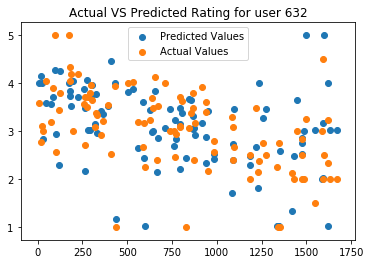

In [8]:
random_users_list = np.random.choice(Matrix_R.index, size=100, replace=False)
random_movies_list = np.random.choice(Matrix_R.columns, size=100, replace=False)
comparisons = []

for user in random_users_list:
    for movie in random_movies_list:
        predicted_rating = rating_prediction(user, movie, each_user_avg_rating[user])
        actual_rating = Matrix_R.loc[user, movie]
        comparisons.append((user, movie, actual_rating, predicted_rating))

df_comparisons = pd.DataFrame(comparisons, columns=['User_id', 'Movie_id', 'Actual_Rating', 'Predicted_Rating'])
print(df_comparisons.head())

# Plot for one user
plot_df = df_comparisons[df_comparisons['User_id'] == df_comparisons['User_id'][3]]
user_id_for_graph = df_comparisons['User_id'][3]
plt.scatter(plot_df['Movie_id'], plot_df['Predicted_Rating'], label='Predicted Values')
plt.scatter(plot_df['Movie_id'], plot_df['Actual_Rating'], label='Actual Values')
plt.legend()
plt.title(f'Actual VS Predicted Rating for user {user_id_for_graph}')
plt.show()

In [9]:
from sklearn.metrics import r2_score
from math import sqrt
r2=r2_score(df_comparisons['Actual_Rating'],df_comparisons['Predicted_Rating'])
print(r2)

-0.34808441792907363
